Könyvtárak

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

# Beolvasás és hozamszámolás

In [116]:
data = pd.read_excel('data.xlsx', sheet_name='Napi',skiprows=1)
data.set_index('Date', inplace=True)
data.index = pd.to_datetime(data.index)
data.sort_index(ascending=False, inplace=True)

rf = 0.042045566   #benne van a fileban, most csak kivettem a jelenlegi értékét
data = data.loc['2023-01-03':]   #itt ezzel lehet kiserletezni 22 elejetol 25 feb vegeig van adat

# napi log hozamok
daily_returns = np.log(data / data.shift(-1))
# évesített várható hozam
mean_returns = daily_returns.mean() * 250  
#piaci portfolio
market_ret = mean_returns['SP500']*0.3+mean_returns['MSCI World']*0.3+mean_returns['Global agg bond']*0.4
print(F'Piaci hozam: {100 * market_ret:.2f} %')
print(f'Kockázatmentes hozam: {100 * rf:.2f} %' )
# levonjuk a risk free ratet
mean_returns = mean_returns - rf 
# évesített kovariancia mátrix
cov_matrix = daily_returns.cov() * 250
corr_matrix = daily_returns.corr()
num_assets = len(mean_returns)
std = np.sqrt(np.diag(np.array(cov_matrix)))
std = pd.Series(index=mean_returns.index, data=std)

colors = sns.color_palette("tab20", num_assets)  

Piaci hozam: 12.46 %
Kockázatmentes hozam: 4.20 %


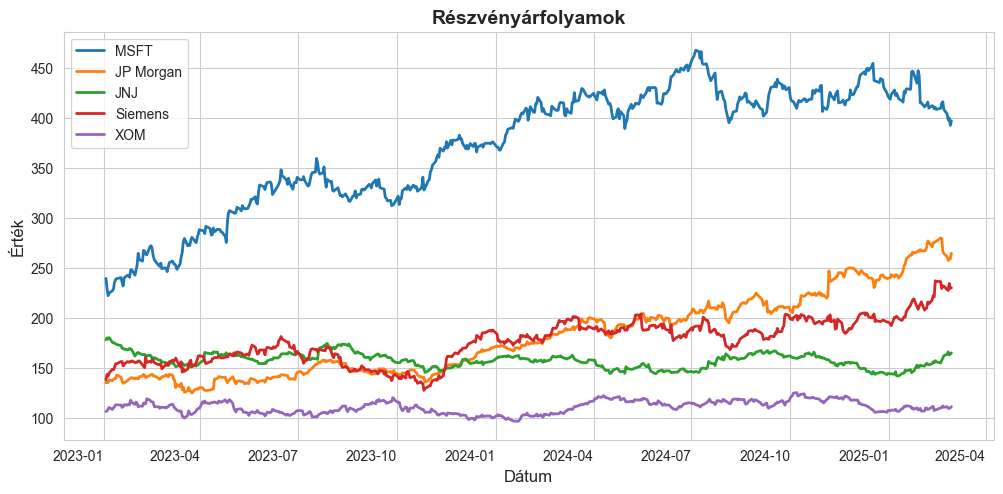

In [117]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

data[data.columns[-5:]].plot(ax=plt.gca(), linewidth=2)

plt.title("Részvényárfolyamok", fontsize=14, fontweight="bold")
plt.xlabel("Dátum", fontsize=12)
plt.ylabel("Érték", fontsize=12)
plt.xticks(rotation=0)

plt.show()


Ezek lennének a pontbecslései, az assetek várható hozamának és szórásának

In [118]:
pd.options.display.float_format = '{:.2f}%'.format

asset_summarum = pd.DataFrame(index = mean_returns.index, columns = ['Várható érték', 'Szórás'])
asset_summarum['Várható érték'] = mean_returns   
asset_summarum['Szórás'] = std
asset_summarum*100


,Várható érték,Szórás
SP500,16.30%,12.86%
MSCI World,13.41%,11.26%
MSCI MXEA,5.60%,12.38%
MSCI EM,1.86%,13.30%
Global agg bond,-1.64%,6.09%
US agg bond,-0.05%,6.29%
US corp HY,5.98%,3.92%
Gold,16.19%,14.20%
DAX,16.61%,16.16%
MSFT,19.18%,22.84%


In [119]:
pd.options.display.float_format = '{:.2f}'.format
corr_matrix

,SP500,MSCI World,MSCI MXEA,MSCI EM,Global agg bond,US agg bond,US corp HY,Gold,DAX,MSFT,JP Morgan,JNJ,Siemens,XOM
SP500,1.00,0.96,0.39,0.29,0.13,0.14,0.55,0.12,0.44,0.66,0.49,0.09,0.35,0.21
MSCI World,0.96,1.00,0.63,0.43,0.26,0.19,0.66,0.17,0.63,0.59,0.48,0.07,0.49,0.23
MSCI MXEA,0.39,0.63,1.00,0.62,0.47,0.25,0.64,0.21,0.83,0.16,0.20,0.03,0.64,0.15
MSCI EM,0.29,0.43,0.62,1.00,0.23,0.08,0.40,0.20,0.42,0.19,0.11,0.01,0.35,0.09
Global agg bond,0.13,0.26,0.47,0.23,1.00,0.86,0.59,0.38,0.42,0.04,-0.11,0.13,0.26,-0.07
US agg bond,0.14,0.19,0.25,0.08,0.86,1.00,0.54,0.37,0.23,0.04,-0.12,0.15,0.11,-0.08
US corp HY,0.55,0.66,0.64,0.40,0.59,0.54,1.00,0.16,0.59,0.29,0.25,0.10,0.42,0.16
Gold,0.12,0.17,0.21,0.20,0.38,0.37,0.16,1.00,0.19,0.08,-0.06,0.03,0.11,0.08
DAX,0.44,0.63,0.83,0.42,0.42,0.23,0.59,0.19,1.00,0.22,0.21,0.04,0.79,0.13
MSFT,0.66,0.59,0.16,0.19,0.04,0.04,0.29,0.08,0.22,1.00,0.12,-0.07,0.18,-0.10


# Függvények

In [120]:
# portfólió varinciája
def portfolio_variance(weights):
    return weights.T @ cov_matrix @ weights

# portfólió hozama
def portfolio_return(weights):
    return np.dot(weights, mean_returns)

# max portfoliohoz
def portfolio_return_neg(weights):
    return -np.dot(weights, mean_returns)

# hasznossági függvény negativan adom meg hogy minimalizalni kelljen 
def utility_function(weights, gamma):
    return -portfolio_return(weights) + gamma/2 *portfolio_variance(weights)


# Megszorítások és korlátok

In [121]:
#1 re összegződjenek a súlyok
def constraints_weight():
    return [
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    ]

#Határportfólió görbe számolásához
def constraints(target_return):
    return [
        {'type': 'eq', 'fun': lambda weights: portfolio_return(weights) - target_return},
        {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
    ]


# korlátok 
bounds_short_allowed = tuple((-1, 1) for _ in range(num_assets))
bounds_without_shortselling = tuple((0, 1) for _ in range(num_assets))

# kezdőpont 
initial_guess = np.array([1/num_assets]*num_assets)

# Maximális es minimális hozamú portfólió 

- Nagyon szépen diverzifikált a minimum varianciájú portfólió 
- A minimális varianciájú portfólió nagyobb hozamú, mint a risk free, ennek azért örülünk. 

### shortselling engedelyezett

In [122]:
max_return = minimize(portfolio_return_neg, initial_guess, method='SLSQP', bounds=bounds_short_allowed, constraints=constraints_weight())
min_return = minimize(portfolio_return, initial_guess, method='SlSQP', bounds = bounds_short_allowed, constraints=constraints_weight())
min_variance = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds_short_allowed, constraints=constraints_weight())

print(f"Max portfólió súlyai: {', '.join(f'{w:.3f}' for w in max_return.x)}")
print(f"Max portfólió hozama: {f'{portfolio_return(max_return.x):3f}'}")
print(f"Max portfólió szórása: {f'{np.sqrt(portfolio_variance(max_return.x)):3f}'}")

print("---------------------------------------------------")

print(f"Min portfólió súlyai: {', '.join(f'{w:.3f}' for w in min_return.x)}")
print(f"Min portfólió hozama: {f'{portfolio_return(min_return.x):3f}'}")
print(f"Min portfólió szórása: {f'{np.sqrt(portfolio_variance(min_return.x)):3f}'}")

print("---------------------------------------------------")


print(f"Min var portfólió súlyai: {', '.join(f'{w:.3f}' for w in min_variance.x)}")
print(f"Min var portfólió hozama: {f'{portfolio_return(min_variance.x):3f}'}")
print(f"Min var portfólió szórása: {f'{np.sqrt(portfolio_variance(min_variance.x)):3f}'}")

asset_summarum['Max hozamú short-tal'] = max_return.x
asset_summarum['Min varianciájú short-tal'] = min_variance.x


Max portfólió súlyai: 1.000, 1.000, -1.000, -1.000, -1.000, -1.000, -0.000, 1.000, 1.000, 1.000, 1.000, -1.000, 1.000, -1.000
Max portfólió hozama: 1.321625
Max portfólió szórása: 0.718081
---------------------------------------------------
Min portfólió súlyai: -1.000, -0.000, 1.000, 1.000, 1.000, 1.000, 1.000, -1.000, -1.000, -1.000, -1.000, 1.000, -1.000, 1.000
Min portfólió hozama: -1.127664
Min portfólió szórása: 0.633679
---------------------------------------------------
Min var portfólió súlyai: -0.022, -0.103, -0.093, 0.040, 0.111, -0.014, 1.000, 0.034, -0.034, 0.020, 0.021, 0.023, 0.003, 0.014
Min var portfólió hozama: 0.043964
Min var portfólió szórása: 0.033908


### shortselling nélkül

- A max hozamú portfólió nem más, mint a legnagyobb hozamú eszköz, a legkisebb hozamú pedig a legkisebb
- A min varianciájú pf. nem más, mint a bond indexek súlyozott átlaga, de leginkább HY


In [123]:
max_return_wout_s = minimize(portfolio_return_neg, initial_guess, method='SLSQP', bounds=bounds_without_shortselling, constraints=constraints_weight())
min_return_wout_s = minimize(portfolio_return, initial_guess, method='SlSQP', bounds = bounds_without_shortselling, constraints=constraints_weight())
min_variance_wout_s = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds_without_shortselling, constraints=constraints_weight())

print(f"Max portfólió súlyai: {', '.join(f'{w:.3f}' for w in max_return_wout_s.x)}")
print(f"Max portfólió hozama: {f'{portfolio_return(max_return_wout_s.x):3f}'}")
print(f"Max portfólió szórása: {f'{np.sqrt(portfolio_variance(max_return_wout_s.x)):3f}'}")
print('--------------------------------------------------------------------')

print(f"Min portfólió súlyai: {', '.join(f'{w:.3f}' for w in min_return_wout_s.x)}")
print(f"Min portfólió hozama: {f'{portfolio_return(min_return_wout_s.x):3f}'}")
print(f"Min portfólió szórása: {f'{np.sqrt(portfolio_variance(min_return_wout_s.x)):3f}'}")
print('--------------------------------------------------------------------')


print(f"Min var portfólió súlyai: {', '.join(f'{w:.3f}' for w in min_variance_wout_s.x)}")
print(f"Min var portfólió hozama: {f'{portfolio_return(min_variance_wout_s.x):3f}'}")
print(f"Min var portfólió szórása: {f'{np.sqrt(portfolio_variance(min_variance_wout_s.x)):3f}'}")

asset_summarum['Max hozamú short nélkül'] = max_return_wout_s.x
asset_summarum['Min varianciájú short nélkül'] = min_variance_wout_s.x

Max portfólió súlyai: 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000, 0.000
Max portfólió hozama: 0.269179
Max portfólió szórása: 0.218915
--------------------------------------------------------------------
Min portfólió súlyai: 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 1.000, 0.000, 0.000
Min portfólió hozama: -0.077594
Min portfólió szórása: 0.161653
--------------------------------------------------------------------
Min var portfólió súlyai: 0.000, 0.000, 0.000, 0.000, 0.011, 0.028, 0.904, 0.017, 0.000, 0.000, 0.000, 0.039, 0.000, 0.001
Min var portfólió hozama: 0.053658
Min var portfólió szórása: 0.038542


In [124]:
asset_summarum

,Várható érték,Szórás,Max hozamú short-tal,Min varianciájú short-tal,Max hozamú short nélkül,Min varianciájú short nélkül
SP500,0.16,0.13,1.00,-0.02,0.00,0.00
MSCI World,0.13,0.11,1.00,-0.10,0.00,0.00
MSCI MXEA,0.06,0.12,-1.00,-0.09,0.00,0.00
MSCI EM,0.02,0.13,-1.00,0.04,0.00,0.00
Global agg bond,-0.02,0.06,-1.00,0.11,0.00,0.01
US agg bond,-0.00,0.06,-1.00,-0.01,0.00,0.03
US corp HY,0.06,0.04,-0.00,1.00,0.00,0.90
Gold,0.16,0.14,1.00,0.03,0.00,0.02
DAX,0.17,0.16,1.00,-0.03,0.00,0.00
MSFT,0.19,0.23,1.00,0.02,0.00,0.00


# Határportfóliók 

### shortselling nélkül

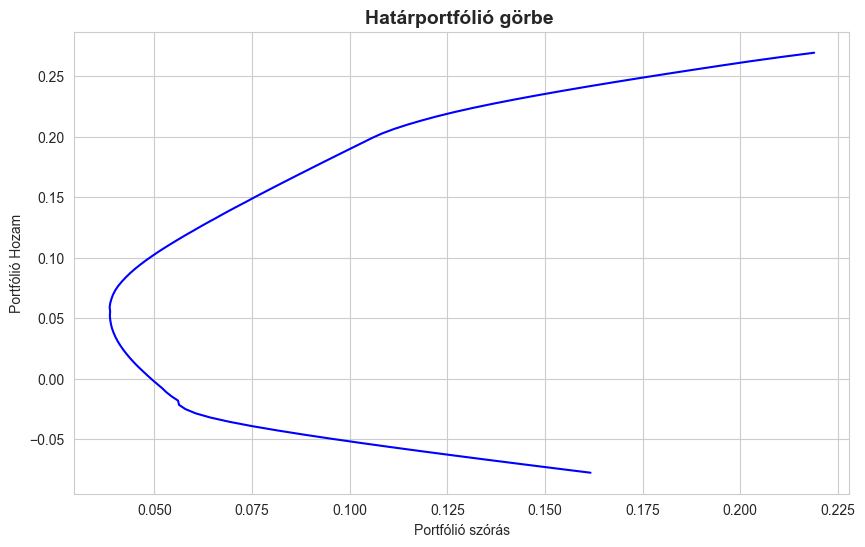

In [125]:
target_returns_wout_s = np.linspace(portfolio_return(min_return_wout_s.x), portfolio_return(max_return_wout_s.x), 100)
frontier_risks_wout_s = []
for target_return in target_returns_wout_s:
    initial_guess = np.array([1/num_assets] * num_assets)
    result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds_without_shortselling, constraints=constraints(target_return))
    frontier_risks_wout_s.append(np.sqrt(portfolio_variance(result.x)))

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks_wout_s, target_returns_wout_s, 'b-',  label='Határportfólió görbe')
plt.xlabel('Portfólió szórás')
plt.ylabel('Portfólió Hozam')
plt.title('Határportfólió görbe ',fontsize = 14, fontweight='bold')
#plt.legend()
plt.show()


### shortselling engedélyezett

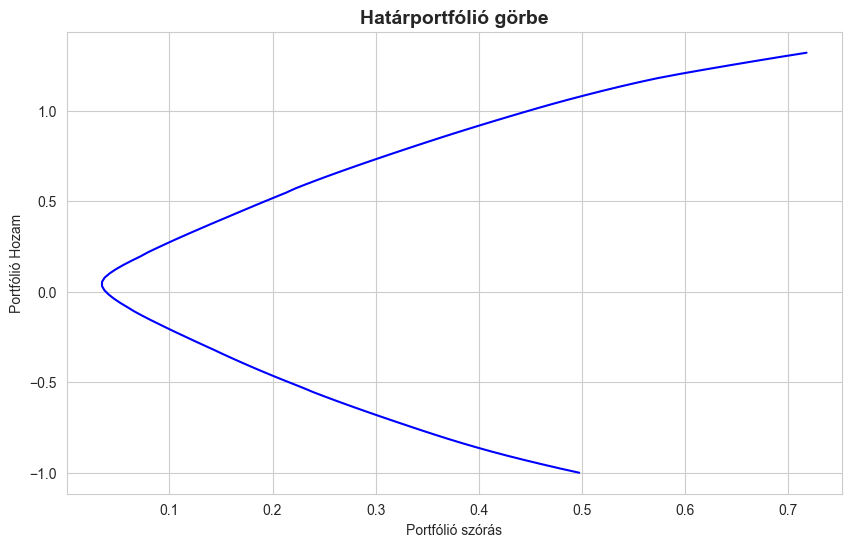

In [126]:
target_returns = np.linspace(-1, portfolio_return(max_return.x), 100)
frontier_risks = []
for target_return in target_returns:
    initial_guess = np.array([1 / num_assets] * num_assets)
    result = minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds_short_allowed, constraints=constraints(target_return))
    frontier_risks.append(np.sqrt(portfolio_variance(result.x)))

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks, target_returns, 'b-', label='')
plt.xlabel('Portfólió szórás', fontsize=10)
plt.ylabel('Portfólió Hozam', fontsize =10)
plt.title('Határportfólió görbe', fontsize = 14, fontweight="bold")
plt.grid(True)
#plt.legend()
plt.show()


# Optimális portfóliók meghatározása

Most jön az a rész, hogy a befeketetők innen választanak különböző kockázatiéhségtől függően  

## shortselling engedélyezett

In [127]:
#kockazatkerulesi rata
gamma = [0,2,4,5,6,8] + [10*x for x in range(1,11)] 

optimal_portfolios = pd.DataFrame(index=gamma, columns = list(mean_returns.index) + ['return', 'std'])

for g in gamma:
    initial_guess = np.array([1 / num_assets] * num_assets)
    result = minimize(lambda w: utility_function(w, g), initial_guess, 
                      method='SLSQP', bounds=bounds_short_allowed, 
                      constraints=constraints_weight())
    optimal_portfolios.loc[g] = list(result.x) + [portfolio_return(result.x), np.sqrt(portfolio_variance(result.x))]


optimal_portfolios*100

,SP500,MSCI World,MSCI MXEA,MSCI EM,Global agg bond,US agg bond,US corp HY,Gold,DAX,MSFT,JP Morgan,JNJ,Siemens,XOM,return,std
0,100.00,100.00,-100.00,-100.00,-100.00,-100.00,-0.00,100.00,100.00,100.00,100.00,-100.00,100.00,-100.00,132.16,71.81
2,100.00,100.00,-100.00,-100.00,-100.00,-100.00,100.00,100.00,100.00,47.96,100.00,-100.00,52.04,-100.00,118.86,57.99
4,100.00,61.88,-100.00,-58.59,-100.00,-56.32,100.00,100.00,100.00,1.21,100.00,-96.68,9.56,-61.05,96.18,42.54
5,100.00,-8.90,-89.83,-41.27,-100.00,-33.60,100.00,100.00,100.00,3.67,100.00,-81.17,4.03,-52.92,85.59,36.51
6,100.00,-43.36,-77.86,-33.10,-100.00,-24.07,100.00,100.00,100.00,3.90,89.32,-68.21,-0.89,-45.73,76.84,31.85
8,100.00,-76.71,-65.58,-22.94,-100.00,-13.53,100.00,100.00,100.00,2.58,69.63,-50.73,-7.06,-35.66,64.91,25.81
10,100.00,-96.53,-58.24,-16.95,-100.00,-7.28,100.00,100.00,100.00,1.77,57.77,-40.27,-10.68,-29.59,57.78,22.49
20,83.54,-100.00,-25.04,-3.77,-100.00,40.15,100.00,54.08,64.18,0.32,29.68,-19.18,-9.35,-14.61,33.79,12.41
30,76.13,-100.00,-7.92,-1.11,-85.98,45.26,100.00,37.84,41.96,0.82,20.57,-12.00,-6.25,-9.33,24.61,8.84
40,73.52,-100.00,-2.07,-0.08,-59.26,31.22,100.00,29.43,30.26,0.84,15.95,-8.67,-4.50,-6.65,19.58,6.98


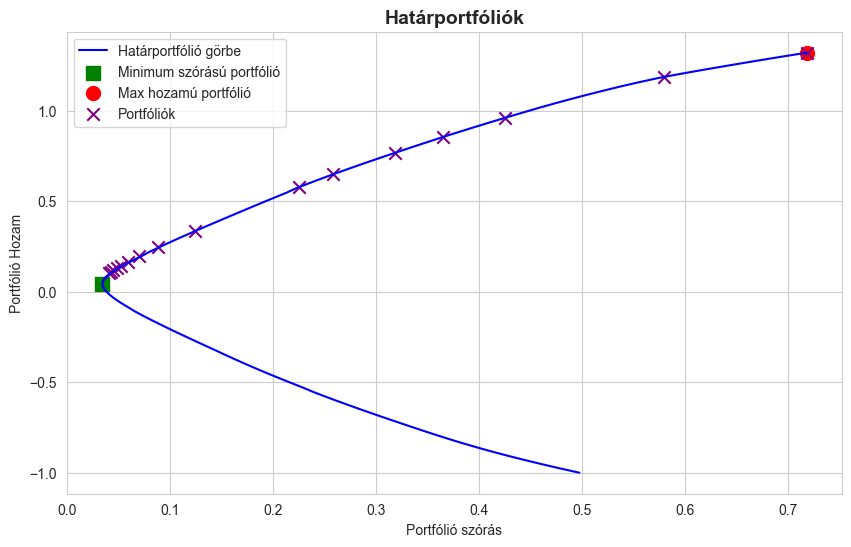

In [128]:
min_var_risk = np.sqrt(portfolio_variance(min_variance.x))
min_var_return = portfolio_return(min_variance.x)

max_ret_risk = np.sqrt(portfolio_variance(max_return.x))
max_ret_return = portfolio_return(max_return.x)

extra_risks = optimal_portfolios["std"].values
extra_returns = optimal_portfolios['return'].values

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks, target_returns, 'b-', label='Határportfólió görbe')

plt.scatter(min_var_risk, min_var_return, color='green', marker='s', label='Minimum szórású portfólió', s=100)
plt.scatter(max_ret_risk, max_ret_return, color='red', marker='o', label='Max hozamú portfólió', s=100)

plt.scatter(extra_risks, extra_returns, color='purple', marker='x', label='Portfóliók', s=80)

plt.xlabel('Portfólió szórás')
plt.ylabel('Portfólió Hozam')
plt.title('Határportfóliók', fontsize = 14, fontweight="bold") #amikor Short Selling engedélyezett
plt.legend()
plt.show()


portfóliók gamma függvényében 

Text(0, 0.5, 'Portfólió súly')

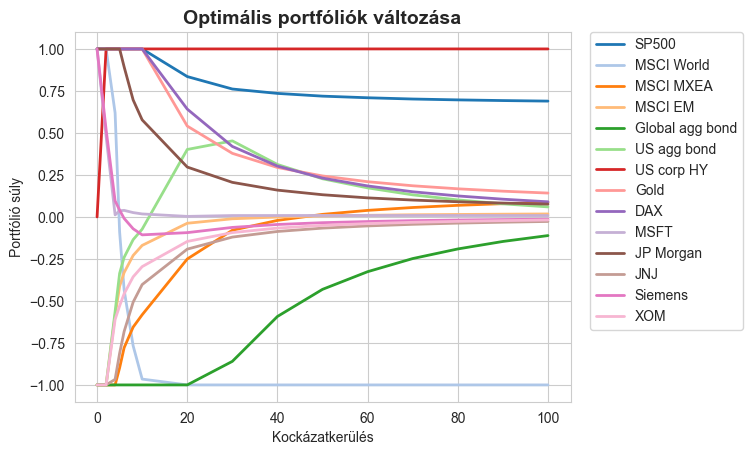

In [129]:
optimal_portfolios[mean_returns.index].plot(color = colors, linewidth = 2)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(True)

plt.title("Optimális portfóliók változása", fontsize = 14, fontweight="bold")
plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió súly")

Ugyanaz barplotban 

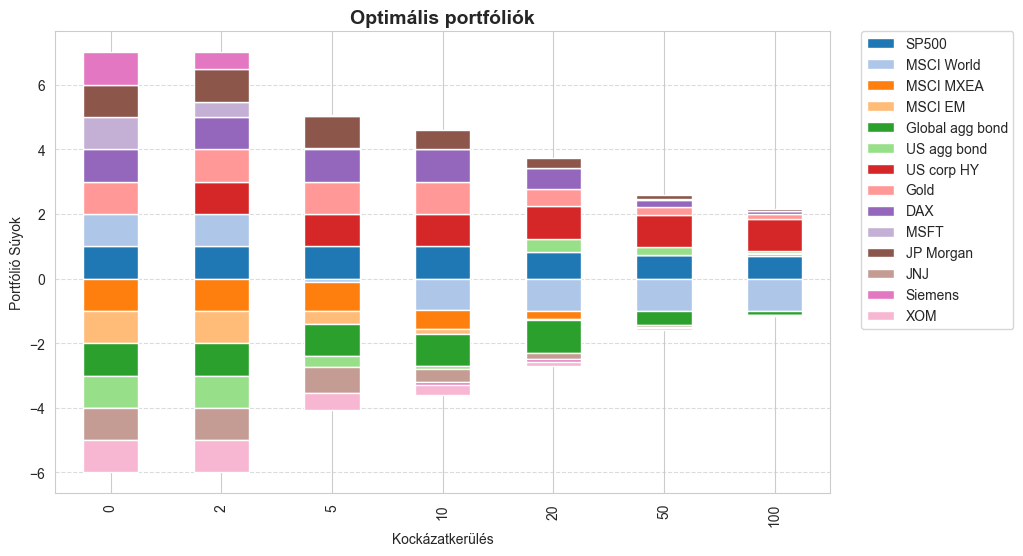

In [130]:
gamma_values = [0, 2, 5, 10, 20, 50, 100]
selected_portfolios = optimal_portfolios.loc[gamma_values, mean_returns.index]

selected_portfolios.plot(kind="bar", figsize=(10, 6), stacked=True, color = colors)

# Labels and title

plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió Súyok")
plt.title("Optimális portfóliók", fontsize = 14, fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Shortselling nem engedélyezett

In [131]:
gamma = [0,2,4,5,6,8] + [10*x for x in range(1,11)] 
optimal_portfolios_wout_s = pd.DataFrame(index=gamma, columns = list(mean_returns.index) + ['return', 'std'])

for g in gamma:
    initial_guess = np.array([1 / num_assets] * num_assets)
    result = minimize(lambda w: utility_function(w, g), initial_guess, 
                      method='SLSQP', bounds=bounds_without_shortselling, 
                      constraints=constraints_weight())
    optimal_portfolios_wout_s.loc[g] = list(result.x) + [portfolio_return(result.x), np.sqrt(portfolio_variance(result.x))]


optimal_portfolios_wout_s

,SP500,MSCI World,MSCI MXEA,MSCI EM,Global agg bond,US agg bond,US corp HY,Gold,DAX,MSFT,JP Morgan,JNJ,Siemens,XOM,return,std
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.27,0.22
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.96,0.00,0.00,0.00,0.27,0.21
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.12,0.62,0.00,0.03,0.00,0.23,0.15
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.13,0.55,0.00,0.04,0.00,0.23,0.13
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.13,0.49,0.00,0.04,0.00,0.22,0.13
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,0.05,0.13,0.42,0.00,0.03,0.00,0.21,0.12
10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.11,0.13,0.37,0.00,0.00,0.00,0.21,0.11
20,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.32,0.09,0.09,0.23,0.00,0.00,0.00,0.16,0.08
30,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.23,0.02,0.05,0.15,0.00,0.00,0.00,0.12,0.06
40,0.00,0.00,0.00,0.00,0.00,0.00,0.67,0.18,0.00,0.04,0.11,0.00,0.00,0.00,0.11,0.05


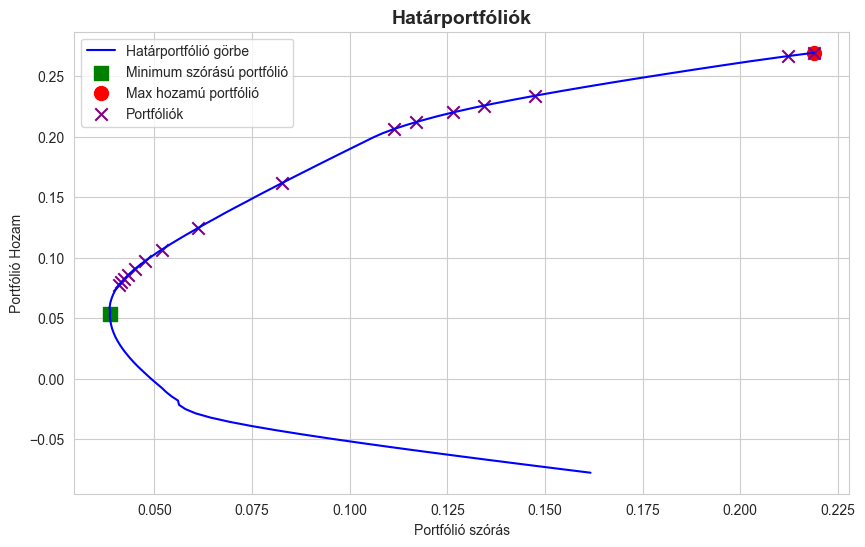

In [132]:
min_var_risk = np.sqrt(portfolio_variance(min_variance_wout_s.x))
min_var_return = portfolio_return(min_variance_wout_s.x)

max_ret_risk = np.sqrt(portfolio_variance(max_return_wout_s.x))
max_ret_return = portfolio_return(max_return_wout_s.x)

extra_risks = optimal_portfolios_wout_s["std"].values
extra_returns = optimal_portfolios_wout_s['return'].values

plt.figure(figsize=(10, 6))
plt.plot(frontier_risks_wout_s, target_returns_wout_s, 'b-', label='Határportfólió görbe')

plt.scatter(min_var_risk, min_var_return, color='green', marker='s', label='Minimum szórású portfólió', s=100)
plt.scatter(max_ret_risk, max_ret_return, color='red', marker='o', label='Max hozamú portfólió', s=100)

plt.scatter(extra_risks, extra_returns, color='purple', marker='x', label='Portfóliók', s=80)

plt.xlabel('Portfólió szórás')
plt.ylabel('Portfólió Hozam')
plt.title('Határportfóliók', fontsize = 14, fontweight="bold" )
plt.legend()
plt.show()

Text(0, 0.5, 'Portfólió súly')

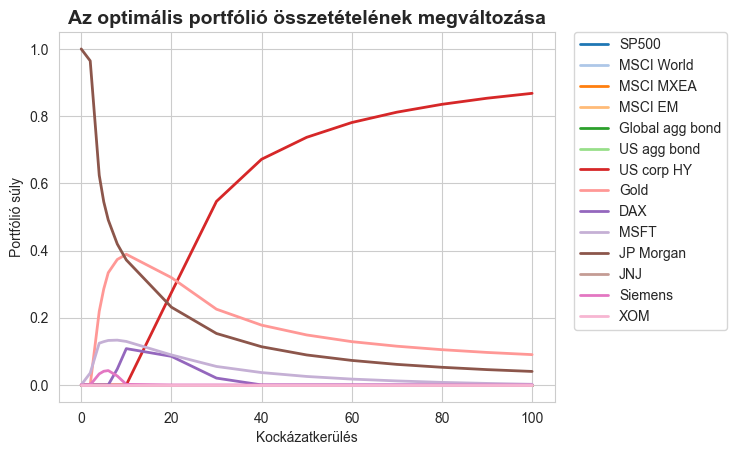

In [133]:
optimal_portfolios_wout_s[mean_returns.index].plot(color = colors, linewidth = 2)
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(True, )

plt.title("Az optimális portfólió összetételének megváltozása", fontsize = 14, fontweight="bold")
plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió súly")

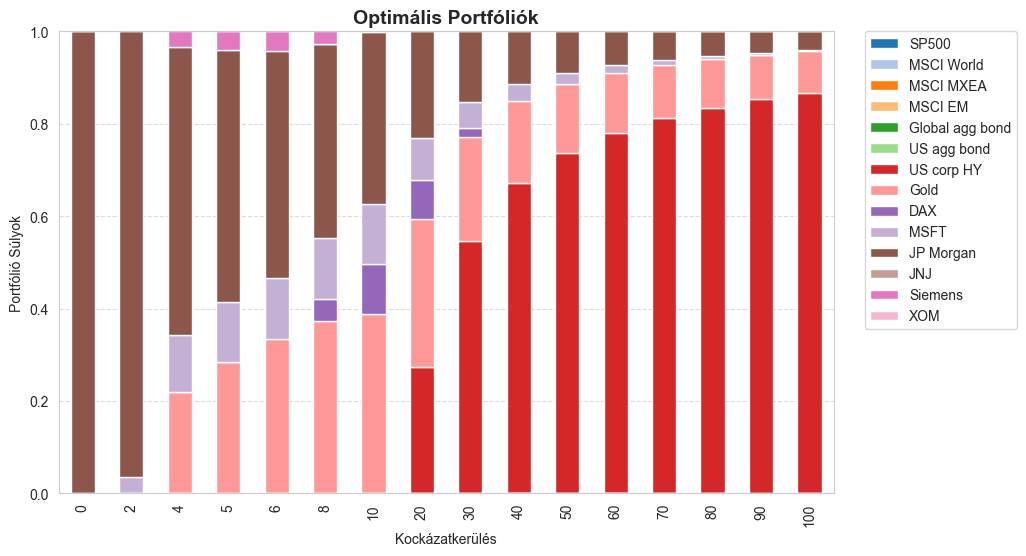

In [134]:
gamma_values = gamma
selected_portfolios = optimal_portfolios_wout_s.loc[gamma_values, mean_returns.index]

selected_portfolios.plot(kind="bar", figsize=(10, 6), stacked=True, color = colors)

plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió Súlyok")
plt.title("Optimális Portfóliók", fontsize = 14, fontweight="bold")
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Robusztussági vizsgálat a hozamokon

In [135]:
mean_returns_original = mean_returns

In [136]:
mean_returns = mean_returns_original

In [137]:
np.random.seed(42)
mean_returns_list = []
for i in range(1000):
    noise = np.random.normal(loc=0, scale=0.02, size=num_assets)
    mean_returns_list.append(mean_returns+noise)

In [138]:
gamma = 5 
optimal_portfolios = pd.DataFrame(columns = list(mean_returns.index) + ['return', 'std'])

for i in range(len(mean_returns_list)):
    mean_returns = mean_returns_list[i]
    initial_guess = np.array([1 / num_assets] * num_assets)
    result = minimize(lambda w: utility_function(w, gamma), initial_guess, 
                      method='SLSQP', bounds=bounds_without_shortselling, 
                      constraints=constraints_weight())
    optimal_portfolios.loc[i] = list(result.x) + [portfolio_return(result.x), np.sqrt(portfolio_variance(result.x))]


optimal_portfolios*100

,SP500,MSCI World,MSCI MXEA,MSCI EM,Global agg bond,US agg bond,US corp HY,Gold,DAX,MSFT,JP Morgan,JNJ,Siemens,XOM,return,std
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,34.86,0.00,14.53,47.11,0.00,3.50,0.00,22.06,12.39
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,32.61,9.32,4.21,53.85,0.00,0.00,0.00,21.29,13.08
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.88,8.35,4.14,50.53,0.00,12.10,0.00,20.26,13.42
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.40,4.66,16.48,53.77,0.00,13.69,0.00,21.97,14.57
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.85,16.78,25.38,51.99,0.00,0.00,0.00,23.34,14.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.27,19.83,13.38,56.53,0.00,0.00,0.00,23.81,14.33
996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,17.34,19.84,22.16,40.66,0.00,0.00,0.00,22.47,12.39
997,1.79,0.00,0.00,0.00,0.00,0.00,0.00,20.55,16.86,17.86,42.94,0.00,0.00,0.00,21.14,12.31
998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,24.77,17.24,4.06,53.92,0.00,0.00,0.00,23.13,13.31


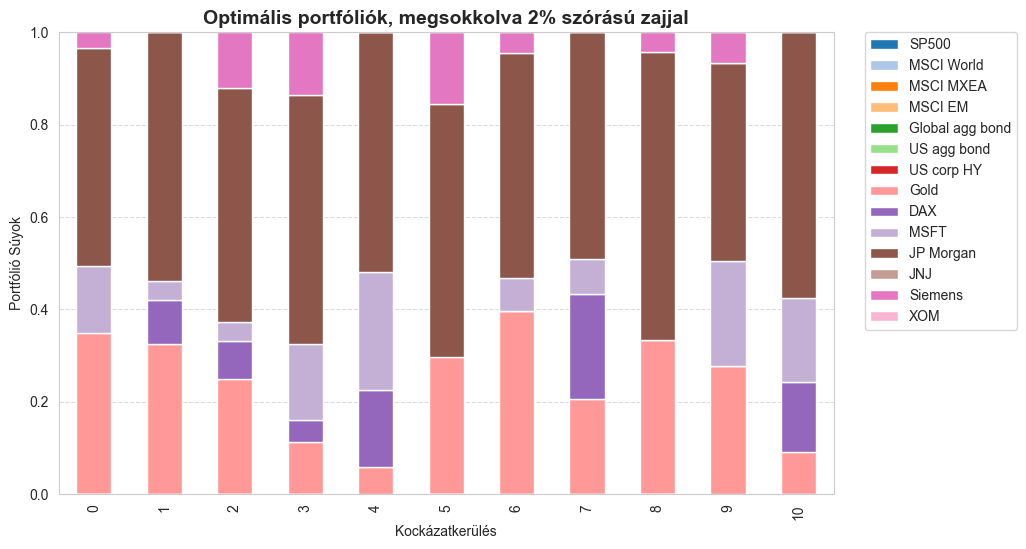

In [139]:
selected_portfolios = optimal_portfolios.loc[:10,mean_returns.index]

selected_portfolios.plot(kind="bar", figsize=(10, 6), stacked=True, color = colors)

plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió Súyok")
plt.title("Optimális portfóliók, megsokkolva 2% szórású zajjal", fontsize = 14, fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [140]:
robustness_value = optimal_portfolios[mean_returns.index].std().mean()
robustness_value

np.float64(0.03747207772872419)

# Most csak az aranyat sokkoljuk

In [141]:
mean_returns = mean_returns_original

In [142]:
mean_returns

SP500              0.16
MSCI World         0.13
MSCI MXEA          0.06
MSCI EM            0.02
Global agg bond   -0.02
US agg bond       -0.00
US corp HY         0.06
Gold               0.16
DAX                0.17
MSFT               0.19
JP Morgan          0.27
JNJ               -0.08
Siemens            0.19
XOM               -0.02
dtype: float64

In [143]:
mean_returns_list = []

noise = np.random.normal(loc=0, scale=0.02, size=1000)
for i in range(1000):
    dummy = mean_returns.copy()
    dummy['Gold'] += noise[i]
    mean_returns_list.append(dummy)


In [145]:
gamma = 5 
optimal_portfolios = pd.DataFrame(columns = list(mean_returns.index) + ['return', 'std'])

for i in range(len(mean_returns_list)):
    mean_returns = mean_returns_list[i]
    initial_guess = np.array([1 / num_assets] * num_assets)
    result = minimize(lambda w: utility_function(w, gamma), initial_guess, 
                      method='SLSQP', bounds=bounds_without_shortselling, 
                      constraints=constraints_weight())
    optimal_portfolios.loc[i] = list(result.x) + [portfolio_return(result.x), np.sqrt(portfolio_variance(result.x))]


optimal_portfolios*100

,SP500,MSCI World,MSCI MXEA,MSCI EM,Global agg bond,US agg bond,US corp HY,Gold,DAX,MSFT,JP Morgan,JNJ,Siemens,XOM,return,std
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.48,0.00,13.76,55.18,0.00,4.58,0.00,22.55,13.61
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,26.61,0.00,13.71,55.14,0.00,4.55,0.00,22.55,13.60
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,49.42,0.00,3.86,46.72,0.00,0.00,0.00,23.53,12.22
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,36.47,0.00,9.73,51.78,0.00,2.01,0.00,22.69,12.84
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.50,0.00,2.75,45.75,0.00,0.00,0.00,23.74,12.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.88,0.00,16.67,57.33,0.00,6.12,0.00,22.67,14.25
996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,40.57,0.00,8.11,50.41,0.00,0.91,0.00,22.87,12.61
997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,41.29,0.00,7.80,50.15,0.00,0.77,0.00,22.91,12.57
998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.14,0.00,16.56,57.24,0.00,6.06,0.00,22.66,14.23


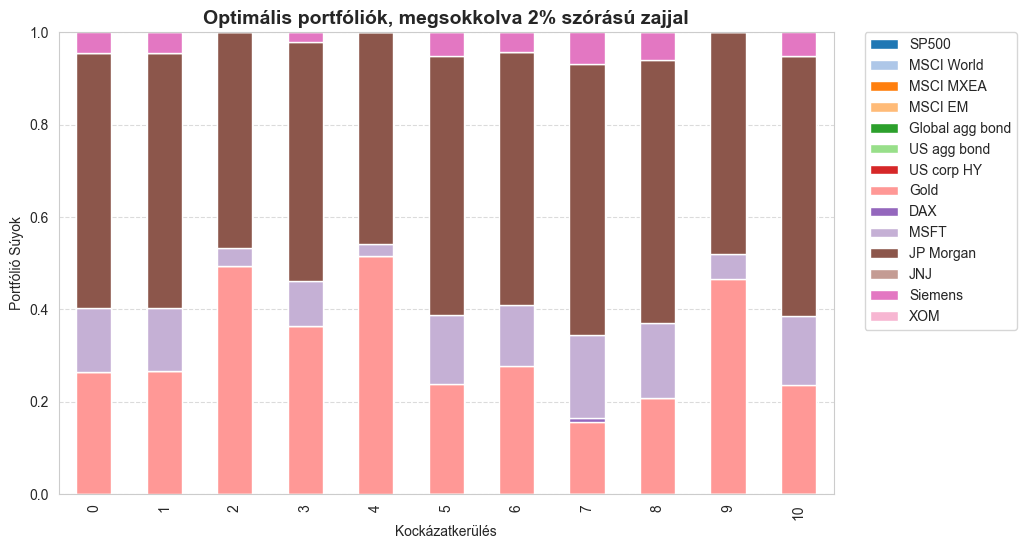

In [146]:
selected_portfolios = optimal_portfolios.loc[:10,mean_returns.index]

selected_portfolios.plot(kind="bar", figsize=(10, 6), stacked=True, color = colors)

plt.xlabel("Kockázatkerülés")
plt.ylabel("Portfólió Súyok")
plt.title("Optimális portfóliók, megsokkolva 2% szórású zajjal", fontsize = 14, fontweight="bold" )
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [147]:
robustness_value = optimal_portfolios['Gold'].std()
robustness_value

np.float64(0.09882157125127607)